## Importar librerías

In [195]:
#!pip install gurobipy
import time
st=time.time()
import gurobipy as gp  # import the installed package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gurobipy import *
from gurobipy import GRB

## Leer archivos y definir modelo

In [196]:
#Definir parámetros
File=pd.ExcelFile("Informacion_OTIS_Caso1.xlsx")
d=File.parse('distancias')
d=d.values
e=File.parse('evacuados')
e=e.values
c=File.parse('capacidad')
c=c.values
p=File.parse('riesgo')
p=p.values
w=0.5

In [197]:
#Crear modelo
model=Model("Modelo 1")

In [198]:
#tamaño del conjunto i
refugios=range(c.shape[1])
#tamaño del conjunto j
zonas_demanda=range(e.shape[1])

In [199]:
#Establecer variables
x= model.addVars(refugios,vtype=GRB.BINARY, name='x') #refugio i abierto o no
y= model.addVars(refugios,zonas_demanda,lb=0, vtype=GRB.INTEGER, name='y') #número de personas de la zona de demanda j asignados al refugio i
s=model.addVar(lb=0.0, ub=4, vtype=GRB.CONTINUOUS, name='s') #máximo riesgo asociado a la apertura de un refugio

In [200]:
#Establecer restricciones
model.addConstrs(s>=p[0,i]*x[i] for i in refugios) #R1/Linealización de FO 3
model.addConstrs(y.sum("*",j)==e[0,j] for j in zonas_demanda) #R2/Asignar a todos los evacuados
model.addConstrs(y.sum(i,"*")<=c[0,i] for i in refugios) #R3/No superar la capacidad
model.addConstrs(x[i]>=(y.sum(i,"*"))/c[0,i] for i in refugios) #R4.1 Asignar a personas solo a refugios abiertos
model.addConstrs(x[i]<=(1-w)+w*(y.sum(i,"*")) for i in refugios) #R4.2 Asignar a personas solo a refugios abiertos

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>,
 20: <gurobi.Constr *Awaiting Model Update*>,
 21: <gurobi.Constr *Awaiting Model Update*>

## Minimizar FO1

In [201]:
#Establecer Función Objetivo
FO1=gp.quicksum(d[i,j]*y[i,j] for i in refugios for j in zonas_demanda)
FO2=gp.quicksum(x[i] for i in refugios)
FO3=s
model.setObjective(FO1, sense=GRB.MINIMIZE)

In [202]:
#Optimizar Modelo
model.optimize()
#Para mayor detalle, eliminar # de las tres siguientes lineas
#for v in model.getVars():
#  print(f"{v.VarName} {v.X:g}")
#print(f"Obj: {model.ObjVal:g}")

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 825 rows, 40481 columns and 161855 nonzeros
Model fingerprint: 0x142d796e
Variable types: 1 continuous, 40480 integer (80 binary)
Coefficient statistics:
  Matrix range     [1e-03, 4e+00]
  Objective range  [2e-02, 4e+01]
  Bounds range     [1e+00, 4e+00]
  RHS range        [5e-01, 9e+02]
Found heuristic solution: objective 26044.499103
Presolve removed 163 rows and 241 columns
Presolve time: 0.35s
Presolved: 662 rows, 40240 columns, 120640 nonzeros
Variable types: 0 continuous, 40240 integer (9600 binary)
Found heuristic solution: objective 24261.757338

Root relaxation: objective 2.541589e+03, 580 iterations, 0.05 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     

In [203]:
FO1_A=gp.quicksum(d[i,j]*y[i,j] for i in refugios for j in zonas_demanda).getValue()
FO2_A=sum(x[i].x for i in refugios)
FO3_A=max(p[0, i] for i in refugios if x[i].x > 0)
Ev_A = sum(y[i,j].x for i in refugios for j in zonas_demanda)

## Minimizar FO2

In [204]:
model.setObjective(FO2, sense=GRB.MINIMIZE)

In [205]:
#Optimizar Modelo
model.optimize()
#Para mayor detalle, eliminar # de las tres siguientes lineas
#for v in model.getVars():
#  print(f"{v.VarName} {v.X:g}")
#print(f"Obj: {model.ObjVal:g}")

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 825 rows, 40481 columns and 161855 nonzeros
Model fingerprint: 0x2469986a
Variable types: 1 continuous, 40480 integer (80 binary)
Coefficient statistics:
  Matrix range     [1e-03, 4e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 4e+00]
  RHS range        [5e-01, 9e+02]

MIP start from previous solve produced solution with objective 76 (0.04s)
Loaded MIP start from previous solve with objective 76

Presolve removed 163 rows and 241 columns
Presolve time: 0.23s
Presolved: 662 rows, 40240 columns, 120640 nonzeros
Variable types: 0 continuous, 40240 integer (9600 binary)

Root relaxation: objective 6.528571e+00, 1859 iterations, 0.14 seconds (0.11 work units)

    Nodes    |    Current Node    

In [206]:
FO1_B=gp.quicksum(d[i,j]*y[i,j] for i in refugios for j in zonas_demanda).getValue()
FO2_B=sum(x[i].x for i in refugios)
FO3_B=max(p[0, i] for i in refugios if x[i].x > 0)
Ev_B = sum(y[i,j].x for i in refugios for j in zonas_demanda)

## Minimizar FO3

In [207]:
#Establecer Función Objetivo
model.setObjective(FO3, sense=GRB.MINIMIZE)

In [208]:
#Optimizar Modelo
model.optimize()
#Para mayor detalle, eliminar # de las tres siguientes lineas
#for v in model.getVars():
#  print(f"{v.VarName} {v.X:g}")
#print(f"Obj: {model.ObjVal:g}")

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 825 rows, 40481 columns and 161855 nonzeros
Model fingerprint: 0x4731b3f7
Variable types: 1 continuous, 40480 integer (80 binary)
Coefficient statistics:
  Matrix range     [1e-03, 4e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 4e+00]
  RHS range        [5e-01, 9e+02]

MIP start from previous solve produced solution with objective 0 (0.04s)
Loaded MIP start from previous solve with objective 0


Explored 0 nodes (0 simplex iterations) in 0.05 seconds (0.01 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%


In [209]:
FO1_C=gp.quicksum(d[i,j]*y[i,j] for i in refugios for j in zonas_demanda).getValue()
FO2_C=sum(x[i].x for i in refugios)
FO3_C=max(p[0, i] for i in refugios if x[i].x > 0)
Ev_C = sum(y[i,j].x for i in refugios for j in zonas_demanda)

## Modelo con Épsilon Constraint

### Establecer límite inferior y límite superior de las restricciones de epsílon

In [210]:
ec1_lb=min(FO1_A,FO1_B,FO1_C)
ec1_ub=max(FO1_A,FO1_B,FO1_C)
ec2_lb=min(FO2_A,FO2_B,FO2_C)
ec2_ub=max(FO2_A,FO2_B,FO2_C)

In [211]:
# Establecer cantidad de elementos en el arreglo correspondiente a ec1
# Para mayor cantidad de iteraciones modificar el número entero en la línea 1 y 2
if ec1_ub-ec1_lb > 7:
  elementos_ec1= 7
else:
  elementos_ec1 = ec1_ub-ec1_lb

In [212]:
ec1=np.linspace(ec1_lb,ec1_ub,elementos_ec1)

In [213]:
# Establecer cantidad de elementos en el arreglo correspondiente a ec2
# Para mayor cantidad de iteraciones modificar el número entero en la línea 1 y 2
if ec2_ub-ec2_lb > 7:
  elementos_ec2= 7
else:
  elementos_ec2 = int(ec2_ub-ec2_lb+1)


In [214]:
ec2=np.linspace(ec2_lb,ec2_ub,elementos_ec2)

### Crear modelo con restricciones épsilon y optimizar

In [215]:
FO1_values = []
FO2_values = []
FO3_values = []
Ev_values = []
R_values=[]
ec1_values=[]
ec2_values=[]
infactible_ec1 = []
infactible_ec2 = []
debiles_ec1 = []
debiles_ec2 = []
dis_ref_values=[]
Ev_Ref_values=[]
D_prom_values=[]
guardar = {}

for k in ec1:
  for l in ec2:
    #Crear modelo
    model_ec=Model("Modelo 2")
    #tamaño del conjunto i
    refugios=range(c.shape[1])
    #tamaño del conjunto j
    zonas_demanda=range(e.shape[1])
    #Establecer variables
    x= model_ec.addVars(refugios,vtype=GRB.BINARY, name='x') #refugio i abierto o no
    y= model_ec.addVars(refugios,zonas_demanda,lb=0, vtype=GRB.INTEGER, name='y') #número de personas de la zona de demanda j asignados al refugio i
    s= model_ec.addVar(lb=0.0, ub=4, vtype=GRB.CONTINUOUS, name='s') #máximo riesgo asociado a la apertura de un refugio #agregar restriccion menor que 1
    #Establecer Función Objetivo
    FO1=gp.quicksum(d[i,j]*y[i,j] for i in refugios for j in zonas_demanda)
    FO2=gp.quicksum(x[i] for i in refugios)
    FO3=s
    model_ec.setObjective(FO3, sense=GRB.MINIMIZE)
    #Establecer restricciones
    model_ec.addConstrs(s>=p[0,i]*x[i] for i in refugios) #R1/Linealización de FO 3
    model_ec.addConstrs(y.sum("*",j)==e[0,j] for j in zonas_demanda) #R2/Asignar a todos los evacuados
    model_ec.addConstrs(y.sum(i,"*")<=c[0,i] for i in refugios) #R3/No superar la capacidad
    model_ec.addConstrs(x[i]>=(y.sum(i,"*"))/c[0,i] for i in refugios) #R4.1 Asignar a personas solo a refugios abiertos
    model_ec.addConstrs(x[i]<=(1-w)+w*(y.sum(i,"*")) for i in refugios) #R4.2 Asignar a personas solo a refugios abiertos
    #Restricciones de Epsilon Constraint
    model_ec.addConstr(quicksum(d[i,j]*y[i,j] for i in refugios for j in zonas_demanda)<=k)
    model_ec.addConstr(quicksum(x[i] for i in refugios)<=l)
    #Optimizar Modelo
    print(f"ec1:{round(k,2)}, ec2:{round(l,2)}")
    model_ec.optimize()
    if model_ec.status == gp.GRB.INFEASIBLE:
      infactible_ec1.append(k)
      infactible_ec2.append(l)
      print("El modelo es infactible.")
      print("----------------------------------------------------------------------------------------------------------------------")
    else:
        #for v in model_ec.getVars():
            #print(f"{v.VarName} {v.X:g}")
        #print(f"Obj: {model_ec.ObjVal:g}")
        FO1_ec=gp.quicksum(d[i,j]*y[i,j] for i in refugios for j in zonas_demanda).getValue()#sumar distancia total con valores optimos
        FO2_ec=sum(x[i].x for i in refugios)#sumar valores de x
        FO3_ec=model_ec.getObjective().getValue()
        Ev_ec=sum(y[i,j].x for i in refugios for j in zonas_demanda)
        R_ec=model_ec.getVars()
        R_ec_values = [var.x for var in R_ec]
        combinacion=(FO1_ec, FO2_ec, FO3_ec)
        # Verificar si la combinación actual es débilmente dominada
        dominada_debil = False
        for key, value in guardar.items():
            if (value['FO1'] <= FO1_ec and value['FO2'] <= FO2_ec and value['FO3'] == FO3_ec):
                dominada_debil = True
                debiles_ec1.append(k)
                debiles_ec2.append(l)
                break
        if not dominada_debil:
            guardar[combinacion] = {'FO1': FO1_ec, 'FO2': FO2_ec, 'FO3': FO3_ec}
            FO1_values.append(FO1_ec)
            FO2_values.append(FO2_ec)
            FO3_values.append(FO3_ec)
            Ev_values.append(Ev_ec)
            R_ec_values = {}  # Diccionario para almacenar los valores de las variables
            Ev_r={}
            dis_ref={}
            D_prom={}
            for i in refugios:
                R_ec_values[i] = {'x': x[i].x, 'y': {j: y[i,j].x for j in zonas_demanda}}
                a=sum(y[i,j].x for j in zonas_demanda)
                Ev_r[i]={'evacuados':a}#cantidad de refugiados en i
                b=sum(d[i,j]*y[i,j] for j in zonas_demanda).getValue()
                dis_ref[i]={'distanciatotal':b}
                if a!=0:
                  m=b/a
                  D_prom[i]={'distanciamedia':m}
                else:
                  D_prom[i]={'distanciamedia': 0}
            D_prom_values.append(D_prom)
            dis_ref_values.append(dis_ref)
            Ev_Ref_values.append(Ev_r)
            R_values.append(R_ec_values)
            ec1_values.append(k)
            ec2_values.append(l)
        #print(f"La distancia recorrida es de: {FO1_ec}")
        #print(f"Se deben abrir {FO2_ec} refugios")
        #print(f"El riesgo minimizado es de {FO3_ec}")
        #print(f"El total de personas asignadas es {Ev_ec}")
        #print(f"La configuración de la solución es {R_ec}")
        print("----------------------------------------------------------------------------------------------------------------------")

ec1:2541.59, ec2:7.0
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 827 rows, 40481 columns and 202335 nonzeros
Model fingerprint: 0xe224765c
Variable types: 1 continuous, 40480 integer (80 binary)
Coefficient statistics:
  Matrix range     [1e-03, 4e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 4e+00]
  RHS range        [5e-01, 3e+03]
Presolve added 92 rows and 0 columns
Presolve removed 0 rows and 80 columns
Presolve time: 0.55s
Presolved: 919 rows, 40401 columns, 120886 nonzeros
Variable types: 0 continuous, 40401 integer (10198 binary)

Root relaxation: infeasible, 1094 iterations, 0.08 seconds (0.06 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent   

  Bounds range     [1e+00, 4e+00]
  RHS range        [5e-01, 3e+03]
Presolve added 92 rows and 0 columns
Presolve removed 0 rows and 80 columns
Presolve time: 0.48s
Presolved: 919 rows, 40401 columns, 120886 nonzeros
Variable types: 0 continuous, 40401 integer (10198 binary)

Root relaxation: objective 2.625000e+00, 1350 iterations, 0.18 seconds (0.07 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    2.62500    0   21          -    2.62500      -     -    1s

Cutting planes:
  Gomory: 6
  Cover: 3
  Implied bound: 17
  Clique: 7
  MIR: 2
  Flow cover: 2
  Flow path: 1

Explored 1 nodes (1410 simplex iterations) in 2.41 seconds (1.25 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
El modelo es infactible.
--------------------------------------------------------------------

Coefficient statistics:
  Matrix range     [1e-03, 4e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 4e+00]
  RHS range        [5e-01, 6e+03]
Presolve removed 88 rows and 200 columns
Presolve time: 0.56s
Presolved: 739 rows, 40281 columns, 150526 nonzeros
Variable types: 0 continuous, 40281 integer (9600 binary)

Root relaxation: objective 0.000000e+00, 1391 iterations, 0.12 seconds (0.07 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   25          -    0.00000      -     -    1s
H    0     0                       0.0000000    0.00000  0.00%     -    1s

Explored 1 nodes (4940 simplex iterations) in 1.56 seconds (1.04 work units)
Thread count was 8 (of 8 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
------

  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 4e+00]
  RHS range        [5e-01, 1e+04]
Presolve removed 148 rows and 240 columns
Presolve time: 0.51s
Presolved: 679 rows, 40241 columns, 160406 nonzeros
Variable types: 0 continuous, 40241 integer (9600 binary)

Root relaxation: objective 0.000000e+00, 1100 iterations, 0.09 seconds (0.06 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   53          -    0.00000      -     -    1s
     0     0    0.00000    0  168          -    0.00000      -     -    3s
     0     0    0.00000    0  173          -    0.00000      -     -    3s
H    0     0                       0.0000000    0.00000  0.00%     -    4s

Cutting planes:
  Gomory: 4
  Cover: 36
  Implied bound: 348
  Clique: 67
  MIR: 10
  StrongCG: 1
  Flow cover: 25
  Zero half: 1
  Relax-and-lift: 2

Explored 1 nodes (4940 simplex 


Optimize a model with 827 rows, 40481 columns and 202335 nonzeros
Model fingerprint: 0xced25f29
Variable types: 1 continuous, 40480 integer (80 binary)
Coefficient statistics:
  Matrix range     [1e-03, 4e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 4e+00]
  RHS range        [5e-01, 1e+04]
Presolve removed 148 rows and 240 columns
Presolve time: 0.86s
Presolved: 679 rows, 40241 columns, 160406 nonzeros
Variable types: 0 continuous, 40241 integer (9600 binary)

Root relaxation: objective 0.000000e+00, 1077 iterations, 0.14 seconds (0.06 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    2          -    0.00000      -     -    1s
H    0     0                       0.0000000    0.00000  0.00%     -    2s

Explored 1 nodes (1077 simplex iterations) in 2.07 seconds (1.03 work units)
Thread count was 8 (of 8 available processor

ec1:13697.68, ec2:53.0
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 827 rows, 40481 columns and 202335 nonzeros
Model fingerprint: 0x57a93a99
Variable types: 1 continuous, 40480 integer (80 binary)
Coefficient statistics:
  Matrix range     [1e-03, 4e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 4e+00]
  RHS range        [5e-01, 1e+04]
Presolve removed 148 rows and 240 columns
Presolve time: 0.78s
Presolved: 679 rows, 40241 columns, 160406 nonzeros
Variable types: 0 continuous, 40241 integer (9600 binary)

Root relaxation: objective 0.000000e+00, 1025 iterations, 0.16 seconds (0.08 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/No

ec1:17416.38, ec2:30.0
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 827 rows, 40481 columns and 202335 nonzeros
Model fingerprint: 0x0d753158
Variable types: 1 continuous, 40480 integer (80 binary)
Coefficient statistics:
  Matrix range     [1e-03, 4e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 4e+00]
  RHS range        [5e-01, 2e+04]
Presolve removed 148 rows and 240 columns
Presolve time: 0.78s
Presolved: 679 rows, 40241 columns, 160406 nonzeros
Variable types: 0 continuous, 40241 integer (9600 binary)

Root relaxation: objective 0.000000e+00, 1004 iterations, 0.13 seconds (0.05 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/No

Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 827 rows, 40481 columns and 202335 nonzeros
Model fingerprint: 0x54dad99e
Variable types: 1 continuous, 40480 integer (80 binary)
Coefficient statistics:
  Matrix range     [1e-03, 4e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 4e+00]
  RHS range        [5e-01, 2e+04]
Presolve removed 148 rows and 240 columns
Presolve time: 0.81s
Presolved: 679 rows, 40241 columns, 160406 nonzeros
Variable types: 0 continuous, 40241 integer (9600 binary)

Root relaxation: objective 0.000000e+00, 1340 iterations, 0.14 seconds (0.06 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   24          -    0.00000      -     -    2s
H    0     0                       0.0000000    0.00000  0.00%     -    2s
     0     0    0.00000    0   24    0.00000  

Presolve removed 148 rows and 240 columns
Presolve time: 0.77s
Presolved: 679 rows, 40241 columns, 160406 nonzeros
Variable types: 0 continuous, 40241 integer (9600 binary)

Root relaxation: objective 0.000000e+00, 1101 iterations, 0.17 seconds (0.10 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    2          -    0.00000      -     -    1s
H    0     0                       0.0000000    0.00000  0.00%     -    1s

Explored 1 nodes (1101 simplex iterations) in 1.78 seconds (0.95 work units)
Thread count was 8 (of 8 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
----------------------------------------------------------------------------------------------------------------------
ec1:21135.07, ec2:76.0
Gurobi Optimizer versio


    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

H    0     0                       0.0000000    0.00000  0.00%     -    1s
     0     0    0.00000    0   11    0.00000    0.00000  0.00%     -    1s

Explored 1 nodes (980 simplex iterations) in 1.08 seconds (0.57 work units)
Thread count was 8 (of 8 available processors)

Solution count 2: 0 3.5 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
----------------------------------------------------------------------------------------------------------------------
ec1:24853.77, ec2:53.0
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 82

### Representación gráfica de los resultados de la optimización

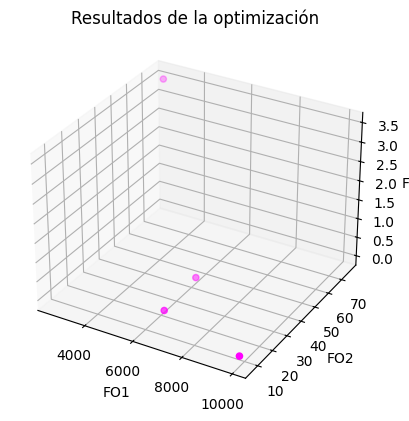

In [217]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(FO1_values, FO2_values, FO3_values, color="magenta")
ax.set_xlabel('FO1')
ax.set_ylabel('FO2')
ax.set_zlabel('FO3')
plt.title("Resultados de la optimización")
plt.savefig("Figura 3D")
plt.show()

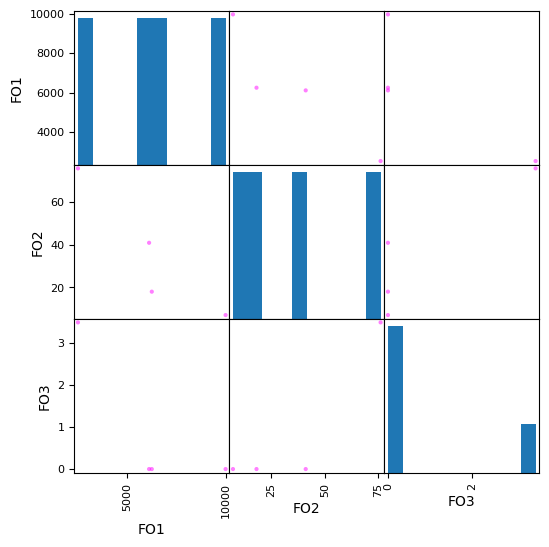

In [218]:
from pandas.plotting import scatter_matrix
A=np.vstack((FO1_values,FO2_values,FO3_values)).T
AA=pd.DataFrame(A, columns =['FO1', 'FO2', 'FO3'])
AA.to_csv("valoresFO.csv", index=False)
scatter_matrix(AA, figsize = (6, 6), diagonal = 'hist', color='magenta')
plt.savefig("Matriz Grafica de dispersion")
plt.show()

### Médidas de desempeño del Frente de Pareto

In [219]:
#!pip install pymoo
from pymoo.indicators.hv import HV
import statistics

In [220]:
comparando=1

In [221]:
if comparando==1:
    csv="resultados.csv"
    file=pd.read_csv(csv)
    file.head()
    min_FO1=file['FO1'].min()
    min_FO2=file['FO2'].min()
    min_FO3=file['FO3'].min()
    max_FO1=file['FO1'].max()
    max_FO2=file['FO2'].max()
    max_FO3=file['FO3'].max()
    AA['FO1']=(AA['FO1']-min_FO1)/(max_FO1-min_FO1)
    AA['FO2']=(AA['FO2']-min_FO2)/(max_FO2-min_FO2)
    AA['FO3']=(AA['FO3']-min_FO3)/(max_FO3-min_FO3)
    A=AA.values
else:
    min_FO1=AA['FO1'].min()
    min_FO2=AA['FO2'].min()
    min_FO3=AA['FO3'].min()
    max_FO1=AA['FO1'].max()
    max_FO2=AA['FO2'].max()
    max_FO3=AA['FO3'].max()
    AA['FO1']=(AA['FO1']-min_FO1)/(max_FO1-min_FO1)
    AA['FO2']=(AA['FO2']-min_FO2)/(max_FO2-min_FO2)
    AA['FO3']=(AA['FO3']-min_FO3)/(max_FO3-min_FO3)
    A=AA.values

In [222]:
ONVG=A.shape[0]
ONVG

4

In [223]:
ref_point = np.array([1,1,1])
ind = HV(ref_point=ref_point)
HVOL=ind(A)
print("HV",HVOL )

HV 0.8508126999241565


In [224]:
kd_values =[]
valores_p=[]
valores_q=[]
pit=np.linspace(0,len(A)-1, ONVG)
pit2=np.linspace(0,len(A)-1, ONVG)
q=0
for p in pit:
  p=int(p)
  for q in pit2:
    q=int(q)
    kd=math.sqrt((A[q,0]-A[p,0])**2+(A[q,1]-A[p,1])**2+(A[q,2]-A[p,2])**2)
    if kd!=0:
      kd_values.append(kd)
      valores_p.append(p)
      valores_q.append(q)

In [225]:
dict = {'dist': kd_values, 'p': valores_p, 'q': valores_q} 
dists = pd.DataFrame(dict)
nearest=dists.groupby('p')['dist'].min()
k_distance=statistics.mean(nearest)
k_distance

0.3224169385435032

### Exportar resultados a archivo de texto

In [227]:
FO1_values

[2541.5885927801655, 6259.171299319706, 6123.230863921544, 9975.350175699285]

In [228]:
et=time.time()
elapsed_time=et-st
archivo="Resumen.txt"
with open (archivo, "w") as arch:
    arch.write(f"Tiempo de ejecución {round(elapsed_time,2)} segundos\n")
    arch.write(f"ONVG: {ONVG}\n")
    arch.write(f"k-distancia: {round(k_distance,2)}\n")
    arch.write(f"Hipervolumen: {round(HVOL,2)}\n")
    arch.write("Opción - Riesgo Minimizado - Distancia - Refugios\n")
    for n in range(len(FO3_values)):
        arch.write(f"    {n}           {FO3_values[n]}          {round(FO1_values[n],2)}km    {FO2_values[n]}\n")
    arch.write("\nCombinaciones de épsilon infactibles:\n")
    for ec1, ec2 in zip(infactible_ec1, infactible_ec2):
        arch.write(f"ec1: {round(ec1,2)}, ec2: {round(ec2,2)}\n")
n_max = len(FO1_values)
it=np.linspace(0,n_max-1,n_max)
for n in it:
    n = int(n)
    FO1_n = FO1_values[n]
    FO2_n = FO2_values[n]
    FO3_n = FO3_values[n]
    Ev_n= Ev_values[n]
    R_n=R_values[n]
    ec1_n=ec1_values[n]
    ec2_n=ec2_values[n]
    Ev_Ref_n=Ev_Ref_values[n]
    dis_ref_n=dis_ref_values[n]
    D_prom_n=D_prom_values[n]
    Ev_Ref_n=Ev_Ref_values[n]
    dis_ref_n=dis_ref_values[n]
    D_prom_n=D_prom_values[n]
    archivo_respuesta=f"opcion_{n}.txt"
    with open (archivo_respuesta, "w") as arch_r:
        arch_r.write(f"La combinación de épsilon es ec1={round(ec1_n,2)} y ec2={round(ec2_n,2)}.\n\n")
        arch_r.write(f"La distancia recorrida es de {round(FO1_n,2)} km.\n")
        arch_r.write(f"Se deben abrir {FO2_n} refugios.\n")
        arch_r.write(f"El riesgo minimizado es de {FO3_n}.\n")
        arch_r.write(f"El total de personas asignadas es {Ev_n}.\n\n")
        arch_r.write("La configuración de la solución es:")
        for i in refugios:
            x_val = R_n[i]['x']  # Obtener el valor de x para el refugio i
            Ev_val =Ev_Ref_n[i]['evacuados']
            dis_val=dis_ref_n[i]['distanciatotal']
            D_val=D_prom_n[i]['distanciamedia']
            if x_val > 0:
               arch_r.write(f"\nPara el refugio {i}:\n")
               arch_r.write(f" + Se refugian {Ev_val} personas\n")
               arch_r.write(f" + Recorren en total {round(dis_val,2)} km\n")
               arch_r.write(f" + Cada una recorre en promedio {round(D_val,2)} km\n")
               for j in zonas_demanda:
                   y_val = R_n[i]['y'][j]  # Obtener el valor de y[i,j] para el refugio i y la zona de demanda j
                   if y_val >0:
                       arch_r.write(f"Asignar {round(y_val,0)} personas de la zona de demanda {j}\n")
            else:
                arch_r.write(f"\nEl refugio {i} no se debe abrir.\n")